 The data contains the following fields:

lat : String variable, Latitude
lng: String variable, Longitude
desc: String variable, Description of the Emergency Call
zip: String variable, Zipcode
title: String variable, Title
timeStamp: String variable, YYYY-MM-DD HH:MM:SS
twp: String variable, Township
addr: String variable, Address
e: String variable, Dummy variable (always 1)

Importing numpy and pandas libraries

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

kaggle datasets download -d mchirico/montcoalert

In [3]:
! kaggle datasets download -d mchirico/montcoalert

 66% 16.0M/24.2M [00:00<00:00, 38.6MB/s]
100% 24.2M/24.2M [00:00<00:00, 69.7MB/s]


In [4]:
!unzip montcoalert.zip

Archive:  montcoalert.zip
  inflating: 911.csv                 


In [55]:

import numpy as np
import pandas as pd


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

plt.rcParams['figure.figsize'] = (6, 4)

In [57]:
df = pd.read_csv('911.csv')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [59]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [60]:

df['zip'].value_counts().head(5)

19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: zip, dtype: int64

In [61]:

df['twp'].value_counts().head(5)

LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: twp, dtype: int64

In [62]:
df['title'].nunique()

148

In [63]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [64]:
df.tail()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
663517,40.157956,-75.348060,SUNSET AVE & WOODLAND AVE; EAST NORRITON; 2020...,19403.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:46:51,EAST NORRITON,SUNSET AVE & WOODLAND AVE,1,Traffic
663518,40.136306,-75.428697,EAGLEVILLE RD & BUNTING CIR; LOWER PROVIDENCE...,19403.0,EMS: GENERAL WEAKNESS,2020-07-29 15:52:19,LOWER PROVIDENCE,EAGLEVILLE RD & BUNTING CIR,1,EMS
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic


In [65]:
df['Reason'].value_counts()

EMS        332692
Traffic    230208
Fire       100622
Name: Reason, dtype: int64

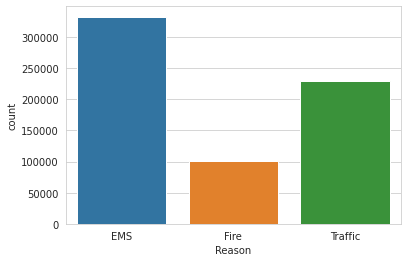

In [66]:
sns.countplot(df['Reason'])

In [67]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [68]:
time = df['timeStamp'].iloc[0]

print('Hour:',time.hour)
print('Month:',time.month)
print('Day of Week:',time.dayofweek)

Hour: 17
Month: 12
Day of Week: 3


In [69]:

df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [70]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,3


In [71]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [72]:

df['Day of Week'] = df['Day of Week'].map(dmap)

df.tail(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
663519,40.013779,-75.300835,HAVERFORD STATION RD; LOWER MERION; Station 3...,19041.0,EMS: VEHICLE ACCIDENT,2020-07-29 15:52:52,LOWER MERION,HAVERFORD STATION RD,1,EMS,15,7,Wed
663520,40.121603,-75.351437,MARSHALL ST & HAWS AVE; NORRISTOWN; 2020-07-29...,19401.0,Fire: BUILDING FIRE,2020-07-29 15:54:08,NORRISTOWN,MARSHALL ST & HAWS AVE,1,Fire,15,7,Wed
663521,40.015046,-75.299674,HAVERFORD STATION RD & W MONTGOMERY AVE; LOWER...,19041.0,Traffic: VEHICLE ACCIDENT -,2020-07-29 15:52:46,LOWER MERION,HAVERFORD STATION RD & W MONTGOMERY AVE,1,Traffic,15,7,Wed


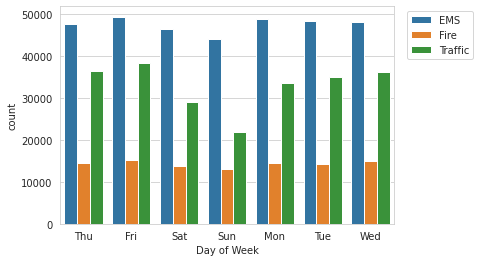

In [73]:
sns.countplot(df['Day of Week'],hue=df['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

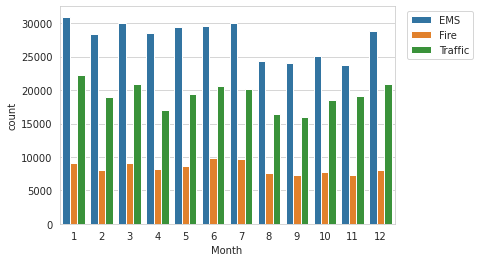

In [74]:
sns.countplot(df['Month'],hue=df['Reason'])

plt.legend(bbox_to_anchor=(1.25,1))

In [75]:
byMonth = df.groupby(by='Month').count()


Text(0, 0.5, 'Number of Calls')

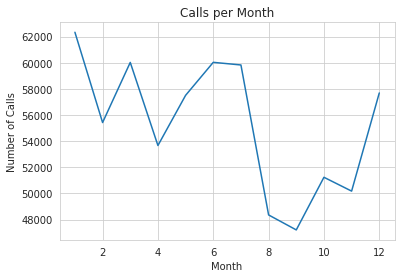

In [76]:
byMonth['e'].plot.line(y='e')
plt.title('Calls per Month')
plt.ylabel('Number of Calls')

In [77]:
byMonth.reset_index(inplace=True)

Text(-8.950000000000003, 0.5, 'Number of Calls')

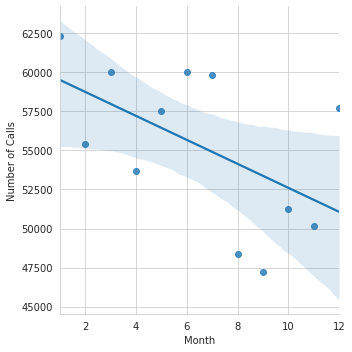

In [78]:

sns.lmplot(x='Month',y='e',data=byMonth)
plt.ylabel('Number of Calls')

In [79]:
df['Date']=df['timeStamp'].apply(lambda x: x.date())

In [80]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10


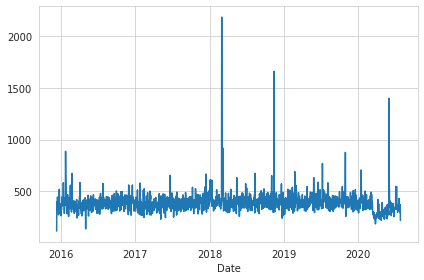

In [81]:

df.groupby('Date').count()['e'].plot.line(y='e')

plt.legend().remove()
plt.tight_layout()

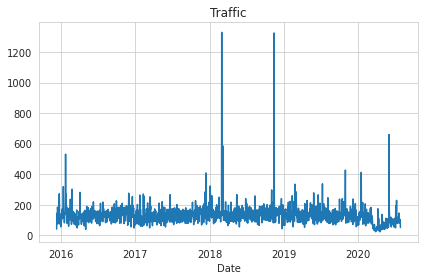

In [82]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

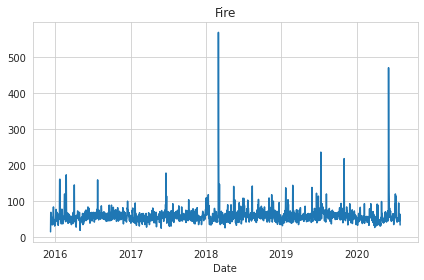

In [83]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

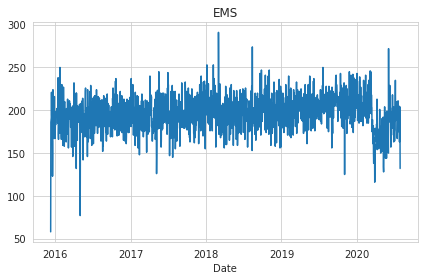

In [84]:
df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

**Hypothesis**

See if there is any direct correlation between the emergency call location and the emergency type.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

We will import only location and emergency

In [86]:
df = pd.read_csv('911.csv', low_memory=False, nrows=1000)
df = df[['lat', 'lng', 'title']]


df.head(10)

,lat,lng,title
0,40.297876,-75.581294,EMS: BACK PAINS/INJURY
1,40.258061,-75.264680,EMS: DIABETIC EMERGENCY
2,40.121182,-75.351975,Fire: GAS-ODOR/LEAK
3,40.116153,-75.343513,EMS: CARDIAC EMERGENCY
4,40.251492,-75.603350,EMS: DIZZINESS
5,40.253473,-75.283245,EMS: HEAD INJURY
6,40.182111,-75.127795,EMS: NAUSEA/VOMITING
7,40.217286,-75.405182,EMS: RESPIRATORY EMERGENCY
8,40.289027,-75.399590,EMS: SYNCOPAL EPISODE
9,40.102398,-75.291458,Traffic: VEHICLE ACCIDENT -


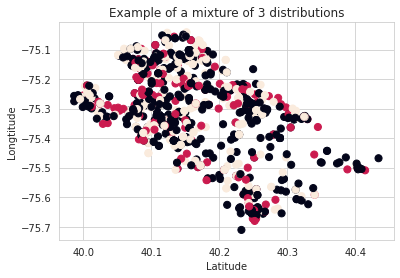

In [87]:
from sklearn.datasets.samples_generator import make_blobs


for i in range (0, df.shape[0]):
    df.iloc[i, 2] = df.iloc[i, 2][: df.iloc[i, 2].find(":")]
    
temp = np.unique(df['title'])
types = dict()
for type_id in range(0, len(temp)):
    types[temp[type_id]] = type_id

del temp

y = df.iloc[:, 2]
y = y.replace(types)

n_components = len(types)
X, truth = make_blobs(n_samples=df.shape[0], centers=n_components)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=50, c = y)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("Latitude")
plt.ylabel("Longtitude");

From the graph above, we cannot see any direct seperation of emergency type according to logtitude and latitude. It makes finding the form of the density of this distribution not plausable. Instead of trying to find a form, we can try to find a probability depending on the calls around the input location.

We shall try NAIVE ESTIMATER

In [88]:
def naive_estimator_evidence(neighbourhood, point, dataset):
    application_matrix = (point[0] - neighbourhood / 2) < dataset['lat']
    application_matrix *= (point[0] + neighbourhood / 2) >= dataset['lat']
    application_matrix *= (point[1] - neighbourhood / 2) < dataset['lng']
    application_matrix *= (point[1] + neighbourhood / 2) >= dataset['lng']
    
    return ((sum(application_matrix) / dataset.shape[0]))

In [89]:
def naive_estimator_likelihood(neighbourhood, point, dataset, emergency):
    emergency_set = dataset[dataset['title'] == emergency]
    likelihood = naive_estimator_evidence(neighbourhood, point, emergency_set)
    
    return (likelihood)

In [90]:
def prior(dataset, emergency):
    emergency_set = dataset[dataset['title'] == emergency]
    prior = emergency_set.shape[0] / dataset.shape[0]
    
    return (prior)

In [91]:
def normalized_posterior(prior, likelihood, evidence):
    posterior = prior * likelihood / evidence
    return(posterior)

In [92]:
def naive_estimator_posterior(neighbourhood, point, dataset, emergency):

    __evidence = naive_estimator_evidence(neighbourhood, point, df)
    __likelihood = naive_estimator_likelihood(neighbourhood, point, df, emergency)
    __prior = prior(df, emergency)
    __posterior = normalized_posterior(__prior, __likelihood, __evidence)
    
    return __posterior

In [93]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :2]
y = df.iloc[:, 2]
train, test = train_test_split(df, test_size=0.2, random_state=21)

X_test = test.iloc[:, :2]
y_test = test.iloc[:, 2]

In [94]:
# Calculate accuracy for Naive Estimator

result = []
temp = np.unique(df['title'])

for i in range(0, X_test.shape[0]):
    best_posterior = 0
    best_class = ''
    for title in temp:
        posterior = naive_estimator_posterior(0.001, X_test.iloc[i, :], train, title)
        
        if(posterior > best_posterior):
            best_posterior = posterior
            best_class = title
    result.append(best_class)
    
print("Accuracy for naive_estimator_posterior with 0.001 neighbour: ", sum(result == y_test) / len(result) * 100)

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:178: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  f"evaluating in Python space because the {repr(op_str)} "


Accuracy for naive_estimator_posterior with 0.001 neighbour:  87.5


So we are getting accuracy of 87.5%